<a href="https://colab.research.google.com/github/femketenharkel/Predicting_Ratings/blob/main/models/Significance_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Significance testing

Check for normality

In [ ]:
pip install scikit-posthocs

Checking normality for Accuracy
Statistics=0.6646559035934483, p=0.0008917018985137991
Sample does not look Gaussian (reject H0)


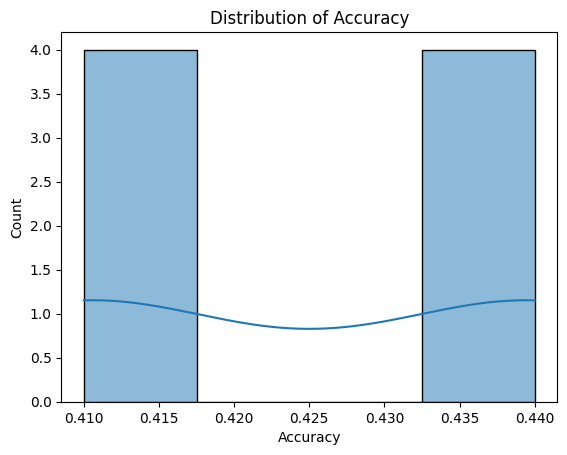

Checking normality for Precision
Statistics=0.7549971611701317, p=0.009275059565861528
Sample does not look Gaussian (reject H0)


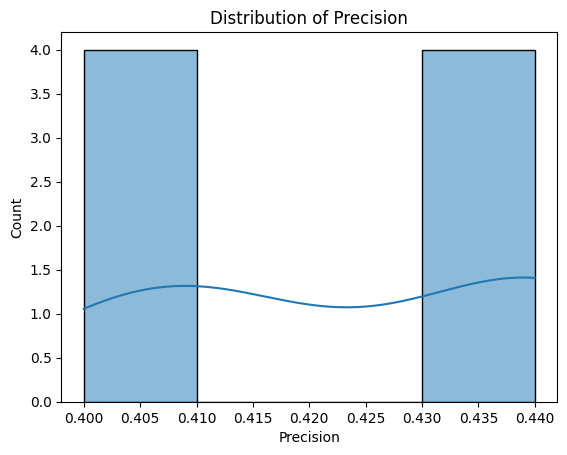

Checking normality for Recall
Statistics=0.6646559035934483, p=0.0008917018985137991
Sample does not look Gaussian (reject H0)


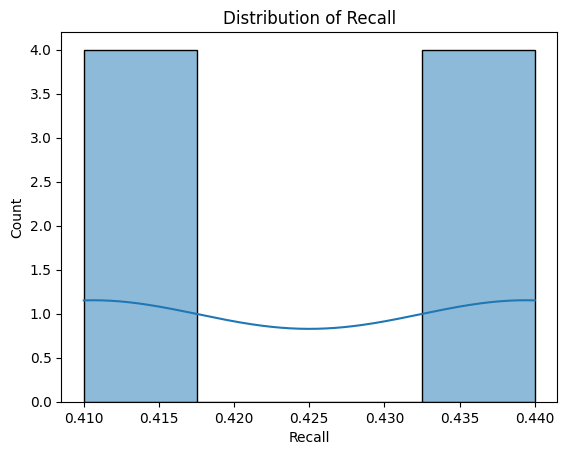

Checking normality for F1_Score
Statistics=0.6646559035934483, p=0.0008917018985137991
Sample does not look Gaussian (reject H0)


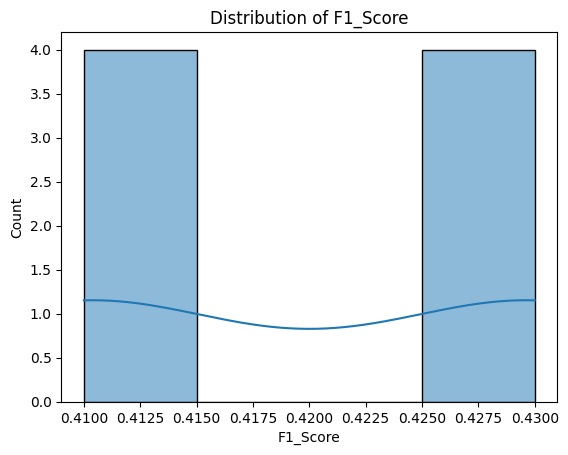

In [3]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Provided data
data = {
    'Supervised': ['RandomForest', 'RandomForest', 'RandomForest', 'RandomForest',
                   'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost'],
    'clustering': ['Baseline', 'KMeans', 'Hierarchical', 'DBSCAN',
                   'Baseline', 'KMeans', 'Hierarchical', 'DBSCAN'],
    'Accuracy': [0.41, 0.41, 0.41, 0.41, 0.44, 0.44, 0.44, 0.44],
    'Precision': [0.41, 0.41, 0.40, 0.41, 0.44, 0.44, 0.44, 0.44],
    'Recall': [0.41, 0.41, 0.41, 0.41, 0.44, 0.44, 0.44, 0.44],
    'F1_Score': [0.41, 0.41, 0.41, 0.41, 0.43, 0.43, 0.43, 0.43]
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to check normality for each metric
def check_normality(df):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']

    for metric in metrics:
        print(f'Checking normality for {metric}')

        # Perform Shapiro-Wilk test
        stat, p = stats.shapiro(df[metric])
        print(f'Statistics={stat}, p={p}')

        # Interpret the p-value
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')

        # Plot the distribution
        sns.histplot(df[metric], kde=True)
        plt.title(f'Distribution of {metric}')
        plt.show()

# Check normality for the provided data
check_normality(df)

Testing significance

In [ ]:
import pandas as pd
from scipy.stats import kruskal
import scikit_posthocs as sp

In [ ]:
# Create dataframe
data = {
    'Supervised': ['RandomForest', 'RandomForest', 'RandomForest', 'RandomForest',
                   'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost'],
    'clustering': ['Baseline', 'KMeans', 'Hierarchical', 'DBSCAN',
                   'Baseline', 'KMeans', 'Hierarchical', 'DBSCAN'],
    'F1_Score': [0.41, 0.41, 0.41, 0.41, 0.43, 0.43, 0.43, 0.43]
}
df = pd.DataFrame(data)

# Perform Kruskal-Wallis test for F1 score
kruskal_result = kruskal(*[df[df['Supervised'] == model]['F1_Score'] for model in df['Supervised'].unique()])

# Print the Kruskal-Wallis test result for F1 score
print(f"Kruskal-Wallis Test for F1 Score:")
print(f"Statistic: {kruskal_result.statistic}, p-value: {kruskal_result.pvalue}")

# Perform Dunn's test as a post-hoc analysis
dunn_result = sp.posthoc_dunn(df, val_col='F1_Score', group_col='Supervised', p_adjust='bonferroni')

# Print Dunn's test results
print("\nDunn's Test Results (p-values):")
print(dunn_result)

Kruskal-Wallis Test for F1 Score:
Statistic: 6.999999999999994, p-value: 0.00815097159350273

Dunn's Test Results (p-values):
              RandomForest   XGBoost
RandomForest      1.000000  0.008151
XGBoost           0.008151  1.000000


In [ ]:
# Dataframe
data = {
    'Supervised': ['RandomForest', 'RandomForest', 'RandomForest', 'RandomForest',
                   'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost'],
    'clustering': ['Baseline', 'KMeans', 'Hierarchical', 'DBSCAN',
                   'Baseline', 'KMeans', 'Hierarchical', 'DBSCAN'],
    'F1_Score': [0.41, 0.41, 0.41, 0.41, 0.43, 0.43, 0.43, 0.43]
}
df = pd.DataFrame(data)

# Perform Kruskal-Wallis test for F1 score
kruskal_result = kruskal(*[df[df['clustering'] == method]['F1_Score'] for method in df['clustering'].unique()])

# Print the Kruskal-Wallis test result for F1 score
print(f"Kruskal-Wallis Test for F1 Score:")
print(f"Statistic: {kruskal_result.statistic}, p-value: {kruskal_result.pvalue}")

# Perform Dunn's test as a post-hoc analysis
dunn_result = sp.posthoc_dunn(df, val_col='F1_Score', group_col='clustering', p_adjust='bonferroni')

# Print Dunn's test results
print("\nDunn's Test Results (p-values):")
print(dunn_result)

Kruskal-Wallis Test for F1 Score:
Statistic: 0.0, p-value: 1.0

Dunn's Test Results (p-values):
              Baseline  DBSCAN  Hierarchical  KMeans
Baseline           1.0     1.0           1.0     1.0
DBSCAN             1.0     1.0           1.0     1.0
Hierarchical       1.0     1.0           1.0     1.0
KMeans             1.0     1.0           1.0     1.0
